## ĐỒ ÁN CUỐI KÌ MÔN LẬP TRÌNH KHOA HỌC DỮ LIỆU NHÓM 

<table style="width:50%">
    <tr> 
        <th>MSSV</th>
        <th>Họ và tên</th>
    </tr>
    <tr>
        <td>19120473</td>
        <td>Phạm Thành Đạt</td>
    </tr>
    <tr>
        <td>19120684</td>
        <td>Trần Bảo Tín</td>
    </tr>
</table>

Link phân công công việc nhóm: <a href='https://docs.google.com/spreadsheets/d/1NN6jiHf6brtwZotZG_DtuIfzV0cHqAMhDPjVd1I06z8/edit?fbclid=IwAR2fk3cs1b3_GRGBNoSkw6xgqTroonEcg-3SDx-06UpIJ4XZddZZcPICdMg#gid=0'>Ở ĐÂY</a>

## Import các thư viện cần thiết

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Thu thập dữ liệu

- Nhóm em thu thập dữ liệu về **chuyển nhượng cầu thủ của các đội bóng ở 5 giải vô địch bóng đá nam hàng đầu của Châu Âu từ cuồi mùa giải năm 2014 trở về sau**. Dữ liệu lấy từ trang `Kaggle`, file dữ liệu là 'Transfer_data.csv', gốc file dữ liệu là <a href='https://www.kaggle.com/ogrofratesi/football-data?select=Transfer_data.csv&fbclid=IwAR1RxKLlrIlNG9DkyC6DjadHB4zaXjDxSaNkRS_O9c2UR1dCrp-_4_mmvq8'>ở đây</a>
- Dữ liệu này là dữ liệu dạng public nên được cho phép người khác có thể lấy và sử dụng. License của dữ liệu là `CCO: Public Domain`.

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [22]:
transfer_df = pd.read_csv('./data/Transfer_data.csv', encoding='utf-8')
transfer_df.head()

,Unnamed: 0,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer
0,3467,Luis SuÃ¡rez,Centre-Forward,27,Liverpool,EPL,Barcelona,La_liga,2014,52.0,81.72
1,3468,James RodrÃ­guez,Attacking Midfield,23,Monaco,Ligue_1,Real Madrid,La_liga,2014,60.0,75.00
2,3469,Ãngel Di MarÃ­a,Right Winger,26,Real Madrid,La_liga,Manchester United,EPL,2014,50.0,75.00
3,3470,David Luiz,Centre-Back,27,Chelsea,EPL,Paris Saint Germain,Ligue_1,2014,26.0,49.50
4,3471,Alexis SÃ¡nchez,Left Winger,25,Barcelona,La_liga,Arsenal,EPL,2014,30.0,42.50


### Dữ liệu gồm bao nhiêu dòng và cột ?

In [23]:
num_rows, num_cols = transfer_df.shape
print('Number of rows: {}\nNumber of columns: {}'.format(num_rows, num_cols))

Number of rows: 934
Number of columns: 11


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả và quan sát sơ bộ qua tập dữ liệu thì mỗi dòng cho biết thông tin chuyển nhượng của một cầu thủ. Không có dòng nào có dấu hiệu khác nhau so với cá dòng còn lại 

### Dữ liệu các dòng có bị lặp không ?

In [24]:
is_duplicated_row = False if len(transfer_df.drop_duplicates()) == transfer_df.shape[0] else True
is_duplicated_row

False

### Mỗi cột có ý nghĩa gì ?

Dưới đây là phần mô tả của các cột dữ liệu trong file `Transfer_data.csv` trên Kaggle:
- **Unnamed: 0**: Không xác định
- **Name**: Tên cầu thủ chuyển nhượng
- **Position**: Vị trí thi đấu của cầu thủ
- **Age**: Tuổi cầu thủ
- **Team_from**: Tên câu lạc bộ đội bóng mà cầu thủ đó thi đấu trước khi chuyển nhượng
- **League_from**: Tên giải đấu của câu lạc bộ cầu thủ đó thi đấu trước khi chuyển nhượng
- **Team_to**: Tên câu lạc bộ đội bóng mà cầu thủ đó chuyển nhượng đến
- **League_to**: Tên giải đấu của câu lạc bộ cầu thủ đó chuyển nhượng đến
- **Season**: Mùa giải chuyển nhượng
- **Market_value**: Giá trị của cầu thủ trên thị trường chuyển nhượng (tính theo đơn vị triệu euro)
- **Transfer**: Giá trị chuyển nhượng thực tế mà câu lạc bộ mới phải trả để sở hữu cầu thủ đó (tính theo đơn vị triệu euro)

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Lấy `dtype` là kiểu dữ liệu của mỗi cột trong dữ liệu và lưu kết quả vào series col_dtypes, series này có index là tên các cột 

In [25]:
col_dtypes = pd.Series(transfer_df.dtypes, transfer_df.columns)
col_dtypes

Unnamed: 0        int64
Name             object
Position         object
Age               int64
Team_from        object
League_from      object
Team_to          object
League_to        object
Season            int64
Market_value    float64
Transfer        float64
dtype: object

Ta cần kiểm tra các cột có kiểu dữ liệu là `object` vì kiểu dữ liệu này có thể bao gồm nhiều kiểu dữ liệu khác nhau trong nó.<br>
Viết 1 hàm có đầu vào là 1 cột (series) có dtype là `objject` và trả về kiểu dữ liệu thật sự của cột dữ liệu đó

In [26]:
def open_dtype_object(s):
    dtypes = set()
    s.apply(lambda x: dtypes.add(type(x)))
    return dtypes

In [27]:
# Kiêm tra kết quả của từng cột có dtype là object
col_names = ['Name', 'Position', 'Team_from', 'League_from', 'Team_to', 'League_to']
for col in col_names:
    print(f'{col} --> {open_dtype_object(transfer_df[col])}')

Name --> {<class 'str'>}
Position --> {<class 'str'>}
Team_from --> {<class 'str'>}
League_from --> {<class 'str'>}
Team_to --> {<class 'str'>}
League_to --> {<class 'str'>}


Ta có thể thấy kiểu dữ liệu của các cột trên đều là `str` nên hợp lí  

**Các vấn đề cần tiền xử lý:**
- Xóa cột `Unnamed: 0` vì cột này không có ý nghĩa gì để khám phá

## Tiền xử lý dữ liệu

### Xóa cột `Unnamed: 0` trong dữ liệu

In [28]:
transfer_df.drop(columns=['Unnamed: 0'], inplace=True)

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào ?

Ta có các cột có kiểu dữ liệu numeric là: `Age`, `Season`, `Market_value`, `Transfer`<br>
<br>Với mỗi cột numeric em sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Sau đó em lưu kết quả vào dataframe `nume_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "min", "max"; và có 4 cột tương ứng với 4 cột ở trên 

In [29]:
def missing_ratio(df):
    return df.isna().mean()*100

nume_cols = ['Age', 'Season', 'Market_value', 'Transfer']
nume_col_profiles_df = transfer_df[nume_cols].agg([missing_ratio, min, max])
nume_col_profiles_df

,Age,Season,Market_value,Transfer
missing_ratio,0.0,0.0,0.535332,0.0
min,16.0,2014.0,0.150000,4.0
max,33.0,2018.0,120.000000,222.0


Các cột trên có min và max có lẽ là không có gì bất thường

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào ?


Dataframe đang xử lý có các cột dạng categorical là: `Name`, `Position`, `Team_from`, `League_from`, `Team_to`, `League_to`<br>
<br>Với mỗi cột categorical, em sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list các giá trị khác nhau (lấy 5 mẫu) (không xét giá trị thiếu). Sau đó em lưu kết quả vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"; và gồm 6 cột tương ứng ở trên

In [30]:
def missing_ratio(df):
    return df.isna().mean()*100
def num_diff_vals(df):
    return len(df.dropna().unique())
def diff_vals(df):
    return df.dropna().unique()[:5]

cate_cols = ['Name', 'Position', 'Team_from', 'League_from', 'Team_to', 'League_to']
cate_col_profiles_df = transfer_df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])
cate_col_profiles_df

,Name,Position,Team_from,League_from,Team_to,League_to
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
num_diff_vals,789,13,222,37,91,5
diff_vals,"[Luis SuÃ¡rez, James RodrÃ­guez, Ãngel Di Mar...","[Centre-Forward, Attacking Midfield, Right Win...","[Liverpool, Monaco, Real Madrid, Chelsea, Barc...","[EPL, Ligue_1, La_liga, Serie_A, Liga NOS]","[Barcelona, Real Madrid, Manchester United, Pa...","[La_liga, EPL, Ligue_1, Bundesliga, Serie_A]"


Nhìn chung không có gì bất thường ở các cột dữ liệu này

In [31]:
transfer_df['Age']

0      27
1      23
2      26
3      27
4      25
       ..
929    22
930    22
931    18
932    29
933    28
Name: Age, Length: 934, dtype: int64

Sau 4 năm giải đấu nào có sự cạnh tranh lớn nhất

Trả lời câu hỏi này ta sẽ biết được đâu là giải đấu đáng xem nhất để từ đó tối đa hóa các kế hoạch(Quảng cáo, truyền hình,...)
Để trả lời câu hỏi này, ta sẽ xem tại giải nào mà các câu lạc bộ bỏ tiền để mua nhiều câu thủ nhất

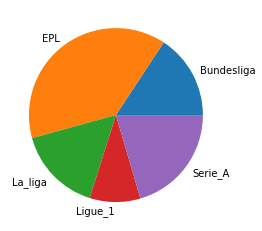

In [32]:
league_name, count = np.unique(transfer_df['League_to'], return_counts = True)
plt.pie(count, labels = league_name)
plt.show()

### Có phải tuổi nghề của môn bóng đá này là 30 hay không ?

Để trả lời câu hỏi trên, cần thực hiện các bước như sau:
- Bước 1: Trích series từ cột Age với tên `age_df` chứa toàn bộ danh sách tuổi của cầu thủ chuyển nhượng
- Bước 2: Lưu số các cầu thủ thuộc các khoảng tuổi khác nhau vào 1 dictionary
- Bước 3: Chia tổng số cầu thủ trong từng khoảng tuổi cho tổng tất cả cầu thủ chuyển nhượng để biết được số lượng phần trăm rồi vẽ đồ thị minh họa

Code bước 1

In [33]:
age_df = transfer_df['Age']

list_range_age = ['x < 20', '20 <= x < 25', '25 <= x < 30', 'x >= 30']

dict_age = dict.fromkeys(list_range_age, 0)

Code bước 2

In [34]:
def countAge(age):
    if age < 20:
        dict_age['x < 20'] += 1
    elif age >= 20 and age < 25:
        dict_age['20 <= x < 25'] += 1
    elif age >= 25 and age < 30:
        dict_age['25 <= x < 30'] += 1
    elif age >= 30:
        dict_age['x >= 30'] += 1

age_df.apply(countAge)
dict_age_df = pd.DataFrame.from_dict(dict_age, orient = 'index')

Code bước 3

Text(0.5, 0, 'Tỉ lệ %')

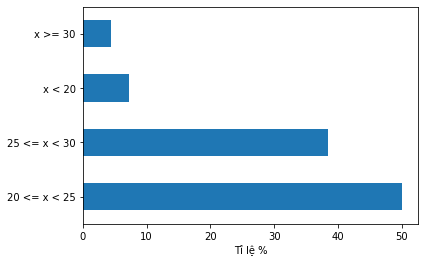

In [35]:
dict_age_df.columns = ['Mount_footballer']

ax = (dict_age_df['Mount_footballer'] / dict_age_df['Mount_footballer'].sum() * 100).round(1).sort_values(ascending=False).plot.barh()
ax.set_xlabel('Tỉ lệ %')

**Nhận xét:** Sau các mùa giải thì có vẻ sức hút của cầu thủ trên 30 tuổi rất kém so với các lứa nhỏ hơn, vì vậy sau 30 tuổi mà vẫn dữ được nghiệp cầu thủ là 1 lựa chọn vô cùng khó khăn và khó thành công được.

### Độ hot của các cầu thủ chuyển nhượng theo từng vị trí tiền đạo, tiền vệ, hậu vệ và thủ môn theo từng mùa giải ?

Để trả lời câu hỏi trên, cần thực hiện các bước như sau:
- Bước 1: Tạo ra 1 cột mới tên là `Pos` để chứa vị trí tổng quát hơn từ cột `Position`.
- Bước 2: Theo từng mùa mà tính tổng số lượng của mỗi loại vị trí được chuyển nhượng
- Bước 3: Từ bước 2 ta đã có 1 dict chứa tổng số lượng cầu thủ chuyển nhượng theo từng vị trí của từng mùa mà vẽ đồ thị minh họa

Code bước 1

In [36]:
dict_pos = dict()
dict_pos['striker'] = ['Centre-Forward', 'Right Winger', 'Second Striker', 'Left Winger']
dict_pos['defender'] = ['Centre-Back', 'Left-Back', 'Right-Back']
dict_pos['midfielder'] = ['Left Midfield', 'Right Midfield', 'Attacking Midfield',  'Defensive Midfield',  'Central Midfield']
dict_pos['goalkeeper'] = ['Goalkeeper']

def Choose_pos(pos):
    for key, value in dict_pos.items():
         if pos in value:
            return key
transfer_df['Pos'] = transfer_df['Position'].apply(Choose_pos)

Code bước 2

In [37]:
season = list(transfer_df['Season'].unique())

cols = ['Season', 'Pos']
pos_ss_df = transfer_df[cols]


list_count = dict()
for item in dict_pos.keys():
    list_count[item] = list(pos_ss_df.where(pos_ss_df['Pos'] == item).dropna().groupby('Season')['Pos'].count())

Code bước 3

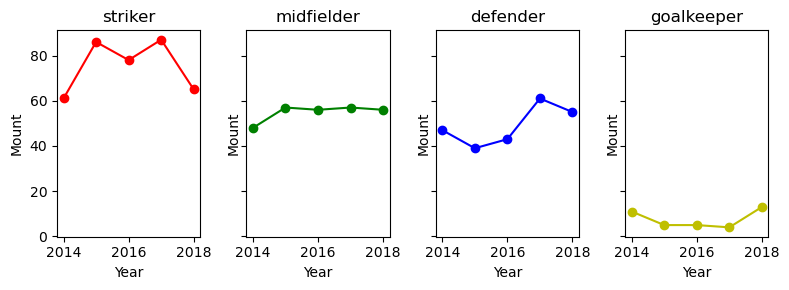

In [38]:
fig, (strike, midfield, defend, goalkeep) = plt.subplots(1,4, figsize=(8,3), sharey=True, dpi=100)
strike.plot(season, list_count['striker'], 'ro-')
midfield.plot(season, list_count['midfielder'], 'go-')
defend.plot(season, list_count['defender'], 'bo-')
goalkeep.plot(season, list_count['goalkeeper'], 'yo-')

strike.set_title('striker'); 
midfield.set_title('midfielder')
defend.set_title('defender')
goalkeep.set_title('goalkeeper')

strike.set_xlabel('Year');  midfield.set_xlabel('Year');  defend.set_xlabel('Year'); goalkeep.set_xlabel('Year');
strike.set_ylabel('Mount');  midfield.set_ylabel('Mount');  defend.set_ylabel('Mount'); goalkeep.set_ylabel('Mount');  

plt.tight_layout()
plt.show()

**Nhận xét:** Sau các mùa giải thì sức hút của tiền đạo là cao hơn nhiều so với các vị trí còn lại, tiền vệ và hậu vệ thì ngang nhau và còn thủ môn thì rất ít được quan tâm so với các vị trí khác.

### Mức giá trung bình của từng loại vị trí trên thị trường chuyển nhượng như thế nào ?

Để trả lời câu hỏi trên, cần thực hiện các bước như sau:
- Bước 1: Tạo ra 1 cột mới tên là `Pos` để chứa vị trí tổng quát hơn từ cột `Position`.
- Bước 2: Theo từng mùa mà tính giá trị chuyển nhượng trung bình của từng vị trí và lưu vào 1 dataframe. `pos_trasfer_per_season_df` rồi vẽ đồ thị minh họa.

Code bước 1

In [39]:
dict_pos = dict()
dict_pos['striker'] = ['Centre-Forward', 'Right Winger', 'Second Striker', 'Left Winger']
dict_pos['defender'] = ['Centre-Back', 'Left-Back', 'Right-Back']
dict_pos['midfielder'] = ['Left Midfield', 'Right Midfield', 'Attacking Midfield',  'Defensive Midfield',  'Central Midfield']
dict_pos['goalkeeper'] = ['Goalkeeper']

def Choose_pos(pos):
    for key, value in dict_pos.items():
         if pos in value:
            return key
transfer_df['Pos'] = transfer_df['Position'].apply(Choose_pos)

Code bước 2

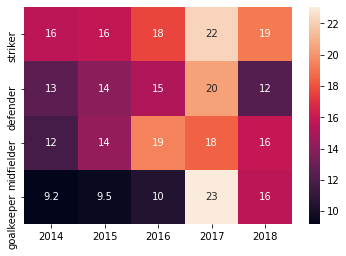

In [40]:
season = list(transfer_df['Season'].unique())

cols = ['Season', 'Pos', 'Transfer']
pos_ss_df = transfer_df[cols]


list_count = dict()
for item in dict_pos.keys():
    list_count[item] = list(pos_ss_df.where(pos_ss_df['Pos'] == item).dropna().groupby('Season')['Transfer'].mean().round(3))

pos_trasfer_per_season_df = pd.DataFrame(list_count.values(), columns=season, index = list_count.keys())

sns.heatmap(pos_trasfer_per_season_df, annot=True)
plt.show()

**Nhận xét:** Giá trị của cầu thủ tăng theo từng năm, có lẽ do lứa cầu thủ càng ngày càng đắt giá chăng ? và nhìn chung thì cũng không có sự khác biệt gì quá lớn giữa các giá trị chuyển nhượng trung bình của từng vị trí.